**이공계생을 위한 확률과 통계** 안승철 지음.

In [31]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd

from matplotlib import font_manager, rc
import matplotlib.pyplot as plt

%matplotlib inline

plt.rcParams['axes.unicode_minus'] = False
rc('font', family='AppleGothic')

# Descriptive Statustics

## chapter 01 자료의 정리와 요약

1. 기술통계: 통계적 결과를 표나 그래프로 정리하는 것
자료 정리(정보를 쉽게 파악하기 위한 자료 가공) / 자료 요약(자료의 특성을 수치로 표현)

### section 01 도표를 이용한 자료 정리

#### 도수분포표
일정한 계급(clss)로 나누고, 각 계급에 속하는 자료의 도수(frequency)를 만든 것 

#### 상대도수분포표
계급의 상대도수를 각 계급에 대응시켜 작성한 표
* 상대도수(relactive frequency): 각 계급도수를 전체 도수로 나눈 것

#### 누적도수분포표
작은 쪽에서 몇 번째로 큰 자료의 값이 대략 얼마인가 알고자 할때 유용함.
* 누적도수(cumulative frequency): 도수분포표에서 첫 계급부터 각 도수를 차례로 더한 값

#### 누적상대도수분포표 
누적도수를 전체 도수로 나눈것

In [23]:
cls = ['0.~', '1.~', '2.~', '3.~', '4.~', '5.~', '6.~', '7.~']
cnt = [4, 11, 7, 8, 2, 4, 2, 2]
data = pd.DataFrame(data={'class': cls, '도수': cnt})
data['상대도수'] = data['도수']/ data['도수'].sum()
data['누적도수'] = data['도수'].cumsum()
data['누적상대도수'] = data['누적도수'] / data['도수'].sum()
data

,class,도수,상대도수,누적도수,누적상대도수
0,0.~,4,0.100,4,0.100
1,1.~,11,0.275,15,0.375
2,2.~,7,0.175,22,0.550
3,3.~,8,0.200,30,0.750
4,4.~,2,0.050,32,0.800
5,5.~,4,0.100,36,0.900
6,6.~,2,0.050,38,0.950
7,7.~,2,0.050,40,1.000


### section 02 그림을 이용한 자료 정리

#### 막대그래프
질적 자료에서 각 도수를 막대 모양으로 나타낸 그림

In [10]:
import seaborn as sns 

Text(0.5, 1.0, '막대그래프')

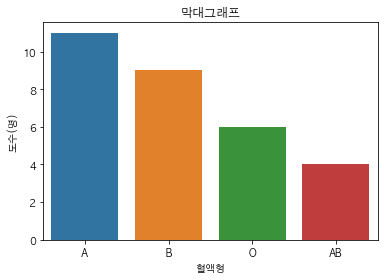

In [33]:
bardata = pd.DataFrame({'혈액형': ['A', 'B', 'O', 'AB'], '도수(명)': [11, 9, 6, 4]})
sns.barplot(data = bardata, x='혈액형', y='도수(명)')
plt.title('막대그래프')

#### 히스토그램

<AxesSubplot:xlabel='class', ylabel='도수'>

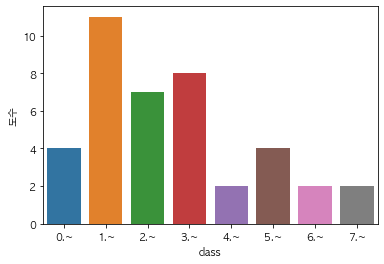

In [35]:
sns.barplot(data = data, x='class', y='도수')

#### 도수분포다각형 
히스토그램에서 각 계급구간의 계급값의 빈도수를 직선으로 연결하여 그린 그림

#### 원그래프: Pie chart

array([<AxesSubplot:ylabel='도수'>], dtype=object)

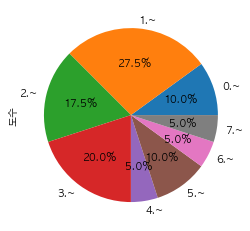

In [62]:
data.set_index('class')[['도수']].plot.pie(autopct="%.1f%%", subplots=True, legend=False)

### section 03 대푯값 
#### 산술평균
평균: 산술평슌, 기하평균, 조화평균 등.. 일반적인 평균은 **산술 평균**을 의미한다.

1. 산술평균에 대한 편차의 합은 0 이다.
2. 편차의 제곱의 합을 최소로 한다. 즉 산술평균에 대한 편차의 제곱의 합은 임의의 수에 대한 편차의 제곱의 합 보다 크지 않다. 
3. 주어진 자료를 모두 사용함으로 정보 손실이 없고, 특히 표본들의 평균인 표본평균은 모집단을 추론할때 유용하다.
4. 양적자료에 대해서만 구할 수 있으며, 극단값에 민감하게 작용한다.

#### 중앙값
X의 n개 자료를 작은 값 부터 크기순으로 배열했을때, 한가운데 위치한 중앙값(중위수)라고 하고 _Me_ 로 나타낸다.

#### 최빈값
가장 많이 나타나는 값, _Mo_ 

#### 산술평균, 중앙값, 최빈값 사이의 관계

단봉형으로 나타나고, 극히 비대칭이 아닌 자료 집단의 산술평균, 중앙값, 최빈값 사이에는 다음과 같은 `피어슨의 실험 공식`이 성립한다.

[피어슨의 실험 공식] https://ko.wikipedia.org/wiki/비대칭도

#### 백분위수와 사분위수
백분위수: 전체자료를 100p%와 100(1-p)%로 나누는 값
사분위수: 특히 제 25, 50, 75, 4등분하는 위치에 있는 값

#### 절사평균
극단값의 유무에 따라 많은 영향을 받음으로 극단값을 제거하여 바람직한 평균을 산출하는 방법

양 끝에서 α%에 해당하는 자료를 제거하고 남은 자료들의 평균

### Section 04 산포도
산포도(measure of dispersion): 자료의 흩어진 정도

아래와 같이 평균이 같은 2그룹이 있다.

In [69]:
import numpy as np

A = [20, 45, 95, 80, 70, 85, 95, 87, 21, 95]
B = [60, 65, 70, 75, 70, 70, 70, 65, 65, 83]

np.mean(A), np.mean(B)

(69.3, 69.3)

In [90]:
cls = [r for r in range(20, 100, 5)]
data = pd.DataFrame({'score':A+B, 'class':['A']*len(A)+['B']*len(B)})
data.groupby(['class']).describe()

score                                                
      count  mean        std   min    25%   50%   75%   max
class                                                      
A      10.0  69.3  29.833054  20.0  51.25  82.5  93.0  95.0
B      10.0  69.3   6.360468  60.0  65.00  70.0  70.0  83.0

#### 범위
_R_ : 최댓값 - 최솟값

#### 사분위수 범위 
(사분위수 범위): 제3사분위수 - 제1사분위수

#### 분산과 표준편차
표준편차의 값이 클수록 산포도가 커지는데, 넓게 흩어져있음을 나타낸다.

#### 변동계수
변량 _X_ 의 산술평균 $\overline{x}$, 표준편차 s 라고할때, 
_X_ 의 변동계수를 _CV_  라고 하고, 다음과 같이 정의 한다.

$CV =  \frac{s}{\overline{x}} \times 100 $

산술평균에 대한 표준편차의 상대적 크기를 나타내는 척도.
변동계수가 크다는 것은 변동 폭이 크다는것을 의미한다.

`상대분산`: 변동계수의 제곱

#### 왜도와 첨도
분포의 대칭이나 비대칭의 정도를 표시하는 척도를 **왜도**라고 한다. 
왜도의 절댃박이 클수록 비대칭의 정도가 심하다는 것을 의미한다. 
* 왜도 = 0, 대칭분포
* 왜도 > 0, 왼쪽으로 치우침
* 왜도 < 0, 오른쪽으로 치우침 

뾰족함의 정도를 나타내는 척도를 **첨도**라고 한다.
* 첨도 = 3 이면, 뾰족한 정도가 표준정규분포와 같다 
* 첨도 > 3 이면, 표준정규분포보다 정점이 높고 뾰족
* 첨도 < 3 이면, 표준정규분포보다 정점이 낮고 완만

[첨도] https://ko.wikipedia.org/wiki/첨도

### section 05 상자그림

<AxesSubplot:xlabel='score', ylabel='class'>

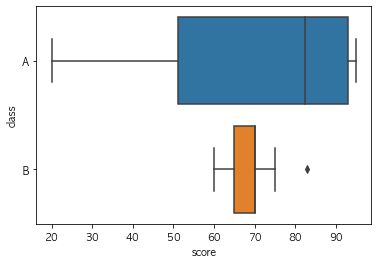

In [97]:
sns.boxplot(x="score", y="class", data = data)